# Atividade pedict TCH

### Importando os dados

In [1]:
import numpy as np
import pandas as pd
base = pd.read_csv('sample_train_dataset_tch_pred.csv')

In [2]:
base.columns

Index(['chavesig', 'tch', 'ndvi_a_p05', 'ncorte', 'areaesti',
       'linhas_falha_km', 'chuva_dia_p04', 'chuva_dia_p12', 'bal_hidrico_p12',
       'bal_hidrico_p04', 'espacamento_m'],
      dtype='object')

In [3]:
colunas = ['tch', 'ndvi_a_p05', 'ncorte', 'areaesti','chuva_dia_p04', 'chuva_dia_p12', 'bal_hidrico_p12',
       'bal_hidrico_p04', 'espacamento_m']

In [4]:
base = pd.read_csv('sample_train_dataset_tch_pred.csv', usecols = colunas)

### Identificando as variaveis indepedentes (x1,x2,xn)

In [5]:
colunas_x =  ['ndvi_a_p05', 'ncorte', 'areaesti','chuva_dia_p04', 'chuva_dia_p12', 'bal_hidrico_p12',
       'bal_hidrico_p04', 'espacamento_m']

### Identificando a variavel depedente (y)

In [6]:
colunas_y = ['tch']

## Normalização dos dados

* O **Objetivo** da Normalização é alterar os valores das colunas numéricas do dataset para uma escala comum, sem distorcer as diferenças nos intervalos de valores
  * Irei utilizar o método **Reescala** para a normalização
    1. **Normalizado = (X - Xmin / Xmin -Xmax)**

### Normalizando os dados manualmente

In [7]:
#Normalizando manualmente em y

tch_y = base['tch']

#Função para normalizar os dados
normalized_y = map(lambda x: (x - tch_y.min())/( tch_y.max()-tch_y.min()), tch_y)
#normalized_y = pd.Series(normalized_y) #Passando para Series para desnormalizar
#normalized_y.head() #Visualização dos dados normalizados


#Função para desnormalizar os dados
#unnormalized_y = map(lambda y: tch_y.min() + (y*(tch_y.max() - tch_y.min()) ), normalized_y)
#unnormalized_y = pd.Series(unnormalized_y) #Passando para Series

In [8]:
# Normalizando manualmente em x

tch_x = base.drop('tch', axis =1)
df = pd.DataFrame(columns = colunas_x)


def normalized_x():
    
    for cont in range(len(tch_x.columns)):
        df.iloc[:,cont] = list(map(lambda x: (x - tch_x.min()[cont])/( tch_x.max()[cont]-tch_x.min()[cont]), tch_x.iloc[:,cont]))
normalized_x()

### Normalizando os dados x e y

In [9]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
base[colunas_x] = x_scaler.fit_transform(base[colunas_x])

In [10]:
y_scaler = MinMaxScaler()
base[colunas_y] = y_scaler.fit_transform(base[colunas_y])

### Armazenando as variaveis indepedentes(x)

In [11]:
x = base.drop('tch', axis = 1)

### Armazenando a variavel depedente(y)

In [12]:
y = base['tch']

### Função para separar o dataset em 70% para train e 30% teste

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 42)

In [14]:
x_test.shape

(1200, 8)

### Criando função regressão linear

#### Executando treinamento

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(x_train,y_train)

### Visualizando os valores dos pesos

In [16]:
#B0 Intercepta o eixo x
interc = regressor.intercept_
interc

0.3782885700585136

In [17]:
# B(nº) Coeficientes Angular
coef = regressor.coef_
coef.reshape(-1,1)

array([[ 1.77920466],
       [-0.21316789],
       [ 0.09779087],
       [ 0.06270696],
       [-0.22636077],
       [ 0.15950572],
       [-0.01740596],
       [ 0.02789494]])

### Predição manual

In [18]:
# Função para predição manual
def pred_manual():
    predict_manual = []
    for c in range(len(x_test)):
        val = regressor.intercept_
        for t in range(len(x_test.columns)):
            val = (x_test.iloc[c][t] * coef[t]) + val
        predict_manual.append(val)
    predict_manual = np.asanyarray(predict_manual)
    predict_manual = predict_manual.reshape(-1,1)
    return predict_manual

In [19]:
pr_manual = pred_manual()
pr_manual = y_scaler.inverse_transform(pr_manual)
print(pr_manual)

[[75.52474604]
 [78.06187937]
 [76.85405768]
 ...
 [74.54892871]
 [73.81222366]
 [76.04377758]]


### Fazendo predição através do modelo

In [20]:
pred = regressor.predict(x_test)

### Formatando os dados de predição

In [21]:
pred = pred.reshape(-1,1)
pr = y_scaler.inverse_transform(pred)

### Formatando os dados de y_teste

In [22]:
y_teste = y_test.values.reshape(-1,1)
y_teste = y_scaler.inverse_transform(y_teste)

### Importando as bibliotecas para os erros MAE e MSE

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


### Mean Absolute Error (MAE)

In [24]:
mae = mean_absolute_error(y_teste, pr)
mae

16.395652033289952

### Mean Squared Error (MSE)

In [25]:
mse = mean_squared_error(y_teste, pr)
mse

404.0661063614837

### Validando o modelo pelo coeficiente de determinação
* R^2(score) -> O quanto o meu modelo explica a variancia dos dados dependentes a partir dos regressores(variaveis indepedentes)


In [26]:
x_teste = x_test.values.reshape(-1,8)
x_teste = y_scaler.inverse_transform(x_teste)

regressor.score(x_teste,y_teste,sample_weight=None)

-3.774044805948429

### Plotando o gráfico

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

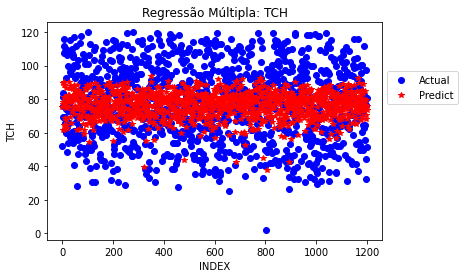

In [28]:
plt.plot(y_teste, 'o', color ='blue')
plt.plot(pr, '*', color = 'red')
plt.legend(['Actual', 'Predict'],loc='center left', bbox_to_anchor=(1, 0.7))
plt.ylabel('TCH')
plt.xlabel('INDEX')
plt.title('Regressão Múltipla: TCH')
plt.show()

## Predição de Talhão sem colheita

#### Importandos os dados para sample_test_dataset_tch_pred

In [29]:
base_teste = pd.read_csv('sample_test_dataset_tch_pred.csv')

In [30]:
base_teste.head()

,Unnamed: 0,chavesig,ndvi_a_p05,ncorte,areaesti,linhas_falha_km,chuva_dia_p04,chuva_dia_p12,bal_hidrico_p12,bal_hidrico_p04,espacamento_m
0,0,36132271,0.776485,5.000000,76.45,0.0,8.039499,0.018295,-3.493576,3.908480,1.40
1,1,98375001,0.790747,3.000000,23.52,0.0,6.564471,3.707210,-0.801189,4.634858,1.25
2,2,91573774,0.801163,1.000000,2.94,0.0,5.569557,1.520328,-0.615612,1.634521,1.25
3,3,9329415,0.648194,5.717728,11.62,0.0,4.059640,3.158646,1.700940,0.255382,1.40
4,4,9193214,0.718747,2.000000,161.69,0.0,5.943546,6.770313,2.838568,4.121959,1.20


### Selecionando apenas os dados de x

In [31]:
colunas_teste = colunas_x

### Lendo dataset novamente apenas com as colunas para x_test

In [32]:
colunas_teste = pd.read_csv('sample_test_dataset_tch_pred.csv', usecols = colunas_teste)

### Fazendo a normalização dos meus dados

In [33]:
from sklearn.preprocessing import MinMaxScaler
x_scaler_teste = MinMaxScaler()
colunas_teste = x_scaler_teste.fit_transform(colunas_teste)

### Fazendo a predição utilizando as colunas de teste

In [34]:
predict_test = regressor.predict(colunas_teste)

### Invertendo a normalização, voltando a metrica do dataset dado

In [35]:
predict_test = predict_test.reshape(-1,1)
y_col_test =y_scaler.inverse_transform(predict_test)

### Acrescentando a coluna 'chavesig' como solicitada no enunciado

In [36]:
resultado = pd.DataFrame(y_col_test)

In [37]:
resultado['chavesig'] = base_teste['chavesig']
resultado.columns = ['tch','chavesig']

In [38]:
resultado = resultado[['chavesig','tch']]

### Salvando o resultando em um arquivo xlsx

In [39]:
excel = pd.ExcelWriter('Predict_Tch.xlsx', engine='xlsxwriter')
resultado.to_excel(excel, sheet_name='TCH')
excel.save()